In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=402493036fec21c2a66fae0229f7a9d2739b1fe54431fccf3206794472ea0bfb
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
seed = 42


# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [ ]:
!pip install pyfluidsynth

In [ ]:
!pip install --upgrade pyfluidsynth

In [ ]:
import pretty_midi
from IPython import display


pm = pretty_midi.PrettyMIDI("/content/DataSet/Rock/6th_avenue_heartache.mid")



In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments

instrument_name =[pretty_midi.program_to_instrument_name(i.program) for i in instrument]
print('Instrument name:', instrument_name)

Number of instruments: 10
Instrument name: ['Acoustic Guitar (steel)', 'Electric Guitar (jazz)', 'Acoustic Guitar (steel)', 'Acoustic Guitar (steel)', 'Acoustic Bass', 'Overdriven Guitar', 'Electric Guitar (muted)', 'Drawbar Organ', 'Trombone', 'Acoustic Grand Piano']


In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=81, note_name=A5, duration=0.1607
1: pitch=71, note_name=B4, duration=0.0804
2: pitch=72, note_name=C5, duration=0.0804
3: pitch=71, note_name=B4, duration=0.0804
4: pitch=72, note_name=C5, duration=0.0804
5: pitch=71, note_name=B4, duration=0.0804
6: pitch=72, note_name=C5, duration=0.0804
7: pitch=71, note_name=B4, duration=0.0804
8: pitch=72, note_name=C5, duration=0.0804
9: pitch=69, note_name=A4, duration=0.0804


In [ ]:
!pip install pandas

In [ ]:
import collections
import numpy as np
import pandas as pd
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
    """Convert MIDI file to a Pandas DataFrame of notes."""
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        instrument = pm.instruments[0]
        notes = collections.defaultdict(list)

        sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
        prev_start = sorted_notes[0].start

        for note in sorted_notes:
            start = note.start
            end = note.end
            notes['pitch'].append(note.pitch)
            notes['start'].append(start)
            notes['end'].append(end)
            notes['step'].append(start - prev_start)
            notes['duration'].append(end - start)
            prev_start = start

        return pd.DataFrame({name: np.array(value) for name, value in notes.items()})



    except OSError as e:
        if "data byte must be in range 0..127" in str(e):
            print(f"Skipping file {midi_file} due to invalid data byte.")
            return None  # Return None to indicate skipping
        else:
            raise  # Re-raise other exceptions
    except EOFError:
        print(f"Skipping file {midi_file} due to EOFError (likely corrupted).")
        return None # Return None to indicate skipping

In [ ]:
raw_notes = midi_to_notes("/content/DataSet/Rock/17.mid")
print(raw_notes)

    pitch    start      end    step  duration
0      50   0.0000   3.9375  0.0000    3.9375
1      57   0.0000   3.9375  0.0000    3.9375
2      62   0.0000   3.9375  0.0000    3.9375
3      66   0.0000   3.9375  0.0000    3.9375
4      69   2.0625   2.4375  2.0625    0.3750
5      69   2.4375   6.5625  0.3750    4.1250
6      67   3.1875   3.9375  0.7500    0.7500
7      57   3.9375   4.6875  0.7500    0.7500
8      50   3.9375   5.0625  0.0000    1.1250
9      62   3.9375   5.4375  0.0000    1.5000
10     66   3.9375   5.8125  0.0000    1.8750
11     57   4.6875   8.4375  0.7500    3.7500
12     50   5.0625   8.4375  0.3750    3.3750
13     62   5.4375   8.4375  0.3750    3.0000
14     66   5.8125   8.4375  0.3750    2.6250
15     69   6.5625   6.9375  0.7500    0.3750
16     69   6.9375   7.6875  0.3750    0.7500
17     71   7.6875   8.6250  0.7500    0.9375
18     57   8.4375   9.9375  0.7500    1.5000
19     62   8.4375  10.3125  0.0000    1.8750
20     66   8.4375  10.6875  0.000

In [ ]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['A2', 'A2', 'A2', 'A2', 'A2', 'G2', 'G2', 'G2', 'G2', 'G2'],
      dtype='<U3')

In [ ]:
import matplotlib.pyplot as plt
from typing import Optional

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

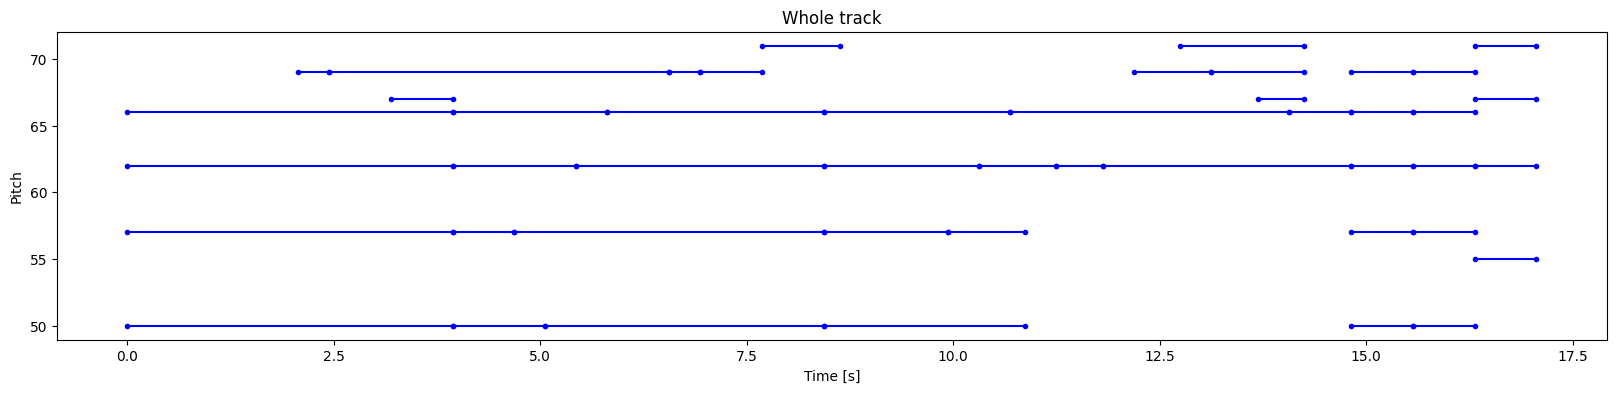

In [ ]:
plot_piano_roll(raw_notes)

In [ ]:
import seaborn as sns

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

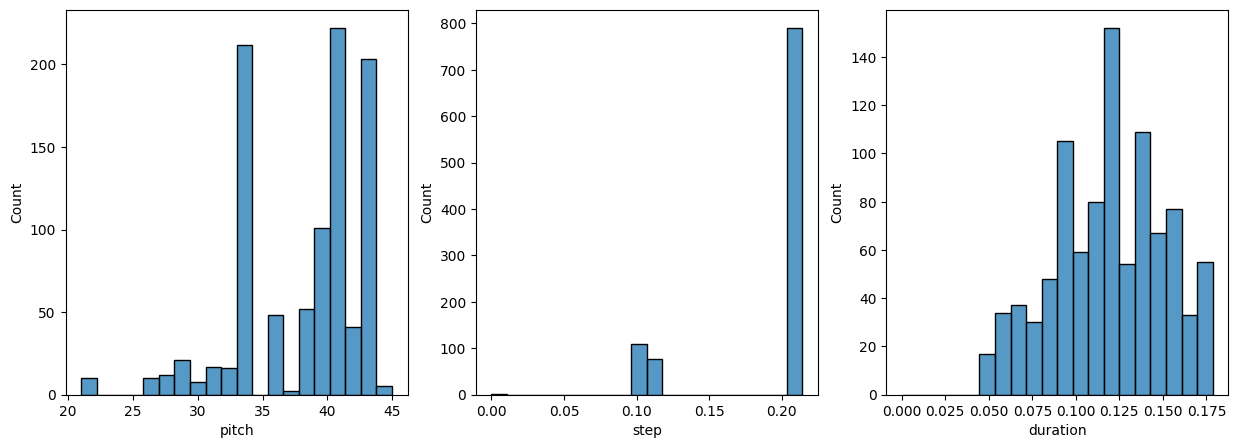

In [ ]:
plot_distributions(raw_notes)

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

In [ ]:
!pip install pypianoroll
!pip install fluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4487 sha256=85ac9ede17d2bd39252b3a2209f7efc53ebd9178c42f77bdfea854e0934a2015
  Stored in directory: /root/.cache/pip/wheels/72/5a/bf/347b142f199fb1bea87f16f8970916226951bc359c947ba19b
Successfully built fluidsynth


In [ ]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [ ]:
import os
fil = os.listdir("/content/DataSet/Rock")
print(len(fil))
print(fil)

1810
['inside_out.mid', 'Its_a_Hard_Life.2.mid', 'jamie.mid', 'fountain_of_salamcis.mid', 'word_of_mouth.mid', 'just_what_i_needed.mid', 'subdivisions.mid', 'Uptown_Girl.1.mid', "i_don't_want_to_know.mid", 'bat_out_of_hell.mid', 'Big_Shot.mid', 'all_around_the_world.mid', 'the_clap.mid', 'Starman.mid', 'high_and_dry.mid', 'Mad_Man_Moon.1.mid', 'get_back.mid', 'angry_young_man.mid', 'Blue_Suede_Shoes.4.mid', 'Back_to_You_MTV_Unplugged_version_.mid', 'super_vixen.mid', 'Father_to_Son.mid', 'Wont_Get_Fooled_Again.mid', 'breakthrough.mid', 'drown.mid', 'jealous_guy.mid', 'walla_walla.mid', 'Substitute.mid', "sweet_child_o'_mine.mid", 'Thought_Id_Died_and_Gone_to_Heaven.mid', 'another_brick_in_the_wall.mid', 'Lights.mid', 'Summer_of_69.3.mid', 'Big_Shot.1.mid', 'Tea_for_One.mid', 'Piano_Man.4.mid', 'Living_on_My_Own.mid', 'Let_Me_Be_Your_Teddy_Bear.1.mid', 'the_miracle.mid', 'Blowin_in_the_Wind.mid', 'What_Is_and_What_Should_Never_Be.mid', 'estranged.mid', 'life_in_the_fast_lane.mid', 'Ever

In [ ]:
num_files = len(fil)
all_notes = []
for f in fil:
  print(f)
  notes = midi_to_notes("/content/DataSet/Rock/"+f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

inside_out.mid
Its_a_Hard_Life.2.mid
jamie.mid
fountain_of_salamcis.mid
word_of_mouth.mid
just_what_i_needed.mid
subdivisions.mid
Uptown_Girl.1.mid


/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


i_don't_want_to_know.mid
bat_out_of_hell.mid
Big_Shot.mid
all_around_the_world.mid
the_clap.mid
Starman.mid
high_and_dry.mid
Mad_Man_Moon.1.mid
get_back.mid
angry_young_man.mid
Blue_Suede_Shoes.4.mid
Back_to_You_MTV_Unplugged_version_.mid
super_vixen.mid
Father_to_Son.mid
Wont_Get_Fooled_Again.mid
breakthrough.mid
drown.mid
jealous_guy.mid
walla_walla.mid
Substitute.mid
sweet_child_o'_mine.mid
Thought_Id_Died_and_Gone_to_Heaven.mid
another_brick_in_the_wall.mid
Lights.mid
Skipping file /content/DataSet/Rock/Lights.mid due to invalid data byte.
Summer_of_69.3.mid
Big_Shot.1.mid
Tea_for_One.mid
Piano_Man.4.mid
Living_on_My_Own.mid
Let_Me_Be_Your_Teddy_Bear.1.mid
the_miracle.mid
Blowin_in_the_Wind.mid
What_Is_and_What_Should_Never_Be.mid
estranged.mid
life_in_the_fast_lane.mid
Everything_I_Do_I_Do_It_For_You.2.mid
hey_you.mid
Father_to_Son.1.mid
whatever.mid
don't_look_back_in_anger.mid
faithfully.mid
the_mexican_connection.mid
Hush.mid
wynona's_big_brown_beaver.mid
the_trial.mid
Skipping

OSError: MThd not found. Probably not a MIDI file

In [ ]:
all_notes = pd.concat(all_notes)

In [ ]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 224117


In [ ]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [ ]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.421875   0.         0.08571425]
 [0.3671875  0.         0.08571425]
 [0.4609375  0.         0.08571425]
 [0.421875   0.1714285  0.04285712]
 [0.3671875  0.         0.04285712]
 [0.4609375  0.         0.04285712]
 [0.3515625  0.1714285  1.371428  ]
 [0.4453125  0.         1.371428  ]
 [0.40625    0.         1.371428  ]
 [0.3671875  1.371428   1.371428  ]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=40.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=1.3714279999999999>}


In [ ]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 25, 3)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 128)            │         67,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ duration (Dense)          │ (None, 1)              │            129 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pitch (Dense)             │ (None, 128)            │         16,512 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ step (Dense)              │ (None, 1)              │            129 │ lstm[0][0]             │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 84,354 (329.51 KB)

 Trainable params: 84,354 (329.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
losses = model.evaluate(train_ds, return_dict=True)
losses

3501/3501 ━━━━━━━━━━━━━━━━━━━━ 112s 20ms/step - duration_loss: 0.3221 - loss: 8.4322 - pitch_loss: 4.8583 - step_loss: 3.2517


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


{'duration_loss': 0.3275566101074219,
 'loss': 12.259191513061523,
 'pitch_loss': 4.856985569000244,
 'step_loss': 7.074638366699219}

In [ ]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

In [ ]:
model.evaluate(train_ds, return_dict=True)

3501/3501 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - duration_loss: 0.3221 - loss: 3.8168 - pitch_loss: 0.2429 - step_loss: 3.2517


{'duration_loss': 0.3275566101074219,
 'loss': 7.645046234130859,
 'pitch_loss': 0.24284929037094116,
 'step_loss': 7.074638366699219}

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        # Added .weights.h5 to the filepath
        filepath='./training_checkpoints/ckpt_{epoch}.weights.h5',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 189s 53ms/step - duration_loss: 0.1452 - loss: 2.9403 - pitch_loss: 0.1874 - step_loss: 2.6077
Epoch 2/50
   1/3501 ━━━━━━━━━━━━━━━━━━━━ 2:40 46ms/step - duration_loss: 0.0597 - loss: 0.2823 - pitch_loss: 0.1877 - step_loss: 0.0349

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3501/3501 ━━━━━━━━━━━━━━━━━━━━ 179s 51ms/step - duration_loss: 0.1357 - loss: 2.8737 - pitch_loss: 0.1731 - step_loss: 2.5650
Epoch 3/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 201s 51ms/step - duration_loss: 0.1337 - loss: 2.8585 - pitch_loss: 0.1683 - step_loss: 2.5565
Epoch 4/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 178s 51ms/step - duration_loss: 0.1322 - loss: 2.8436 - pitch_loss: 0.1637 - step_loss: 2.5477
Epoch 5/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 178s 51ms/step - duration_loss: 0.1308 - loss: 2.8311 - pitch_loss: 0.1639 - step_loss: 2.5364
Epoch 6/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 174s 50ms/step - duration_loss: 0.1300 - loss: 2.8290 - pitch_loss: 0.1649 - step_loss: 2.5341
Epoch 7/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 173s 49ms/step - duration_loss: 0.1308 - loss: 2.8540 - pitch_loss: 0.1645 - step_loss: 2.5586
Epoch 8/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 202s 49ms/step - duration_loss: 0.1289 - loss: 2.8248 - pitch_loss: 0.1629 - step_loss: 2.5330
Epoch 9/50
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 172s 49ms/

In [ ]:
%%time
epochs = 10

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 172s 49ms/step - duration_loss: 0.1276 - loss: 2.6848 - pitch_loss: 0.1587 - step_loss: 2.3984
Epoch 2/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 168s 48ms/step - duration_loss: 0.1299 - loss: 2.7766 - pitch_loss: 0.1652 - step_loss: 2.4815
Epoch 3/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 167s 48ms/step - duration_loss: 0.1314 - loss: 2.7460 - pitch_loss: 0.1679 - step_loss: 2.4468
Epoch 4/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 202s 48ms/step - duration_loss: 0.1326 - loss: 2.7460 - pitch_loss: 0.1692 - step_loss: 2.4443
Epoch 5/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 169s 48ms/step - duration_loss: 0.1328 - loss: 2.7846 - pitch_loss: 0.1665 - step_loss: 2.4853
Epoch 6/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 201s 48ms/step - duration_loss: 0.1346 - loss: 2.7932 - pitch_loss: 0.1676 - step_loss: 2.4911
Epoch 7/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 169s 48ms/step - duration_loss: 0.1337 - loss: 2.8079 - pitch_loss: 0.1723 - step_loss: 2.5019
Epoch 8/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━

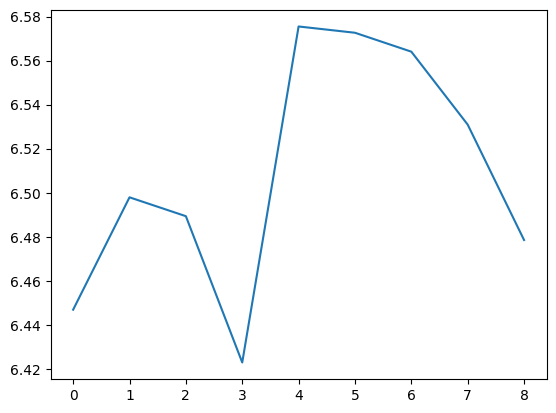

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 2.0
num_predictions = 125

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [ ]:
print(duration)

0.026182889938354492


In [ ]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,67,0.000000,2.112565,0.000000,2.112565
1,88,5.942536,0.387258,5.942536,6.329794
2,88,5.062245,0.216333,11.004781,11.221114
3,83,5.214511,0.209324,16.219292,16.428616
4,88,5.215885,0.205951,21.435177,21.641128
5,78,5.225343,0.201182,26.660520,26.861702
6,88,5.182431,0.207418,31.842951,32.050369
7,88,5.224943,0.202446,37.067894,37.270340
8,83,5.228539,0.198005,42.296433,42.494438
9,78,5.226016,0.196111,47.522449,47.718560


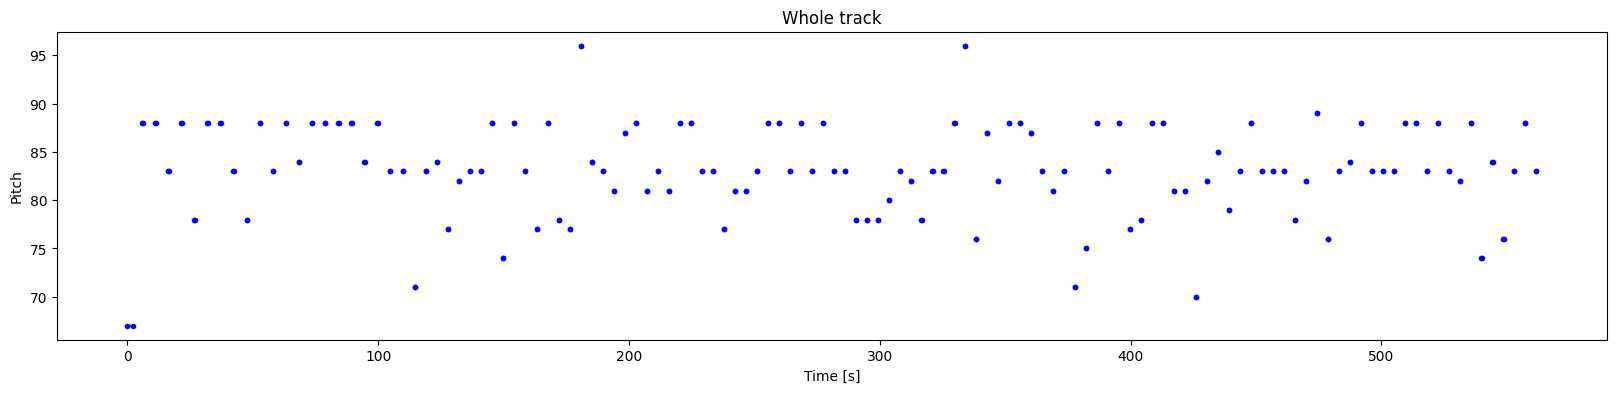

In [ ]:
plot_piano_roll(generated_notes)

In [ ]:
out_file = 'outpu.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name='Acoustic Bass')
